<font size='6' color='red'>MODEL TRAINING</font>

In [1]:
import numpy as np

import pandas as pd
pd.set_option('display.max_colwidth',100,'display.max_columns',999)
pd.set_option('display.float_format', lambda x:'%.3f' %x)

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

import sklearn

import warnings

##### Importing all algorithms on which we want to model our dataset

In [2]:
from sklearn.linear_model import ElasticNet, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [3]:
df = pd.read_csv('analytical_base_table.csv')
df.shape

(1863, 40)

<font size='4' color='red'>Splitting dataset</font>

In [4]:
from sklearn.model_selection import train_test_split

y = df.tx_price #target variable
X = df.drop('tx_price',axis=1)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1234)
print(len(X_train),len(X_test),len(y_train),len(y_test))

1490 373 1490 373


<font size='4' color='red'>Building Model Pipelines</font>

In [6]:
# Standardizing data in training df manually
# Normal standard deviation
X_train_new = (X_train - X_train.mean())/X_train.std()
X_train_new.describe()

,beds,baths,sqft,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,two_two,during_recession,property_age,school_score,exterior_walls_Brick,exterior_walls_Brick veneer,exterior_walls_Combination,exterior_walls_Metal,exterior_walls_Missing,exterior_walls_Other,exterior_walls_Siding (Alum/Vinyl),exterior_walls_Wood,roof_Asphalt,roof_Composition Shingle,roof_Missing,roof_Other,roof_Shake Shingle,property_type_Apartment / Condo / Townhouse,property_type_Single-Family
count,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000
mean,-0.000,-0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.000,0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-2.269,-1.697,-1.405,-0.366,-2.688,-0.841,-0.976,-0.593,-0.697,-0.756,-0.716,-0.891,-0.876,-2.496,-2.943,-3.511,-1.656,-1.533,-2.790,-3.440,-0.319,-0.601,-1.148,-2.316,-0.749,-0.157,-0.250,-0.265,-0.368,-0.198,-0.606,-0.265,-0.281,-1.343,-0.483,-0.253,-0.186,-0.850,-1.176
25%,-0.405,-0.622,-0.749,-0.322,0.372,-0.713,-0.753,-0.593,-0.697,-0.641,-0.716,-0.735,-0.654,-0.833,-0.527,-0.688,-0.630,-0.638,-0.765,0.427,-0.319,-0.601,-0.865,-0.921,-0.749,-0.157,-0.250,-0.265,-0.368,-0.198,-0.606,-0.265,-0.281,-1.343,-0.483,-0.253,-0.186,-0.850,-1.176
50%,0.527,0.452,-0.316,-0.189,0.372,-0.394,-0.309,-0.356,-0.294,-0.374,-0.290,-0.307,-0.321,-0.077,0.228,0.058,-0.168,-0.204,0.248,0.427,-0.319,-0.601,-0.205,0.009,-0.749,-0.157,-0.250,-0.265,-0.368,-0.198,-0.606,-0.265,-0.281,0.744,-0.483,-0.253,-0.186,-0.850,0.850
75%,0.527,0.452,0.533,-0.028,0.372,0.351,0.581,0.118,0.109,0.199,0.349,0.470,0.291,0.679,0.731,0.760,0.474,0.411,0.754,0.427,-0.319,1.662,0.644,0.939,1.334,-0.157,-0.250,-0.265,-0.368,-0.198,1.650,-0.265,-0.281,0.744,-0.483,-0.253,-0.186,1.176,0.850
max,1.459,3.676,4.255,12.174,0.372,4.821,4.360,5.685,5.618,5.741,6.741,5.990,4.346,4.609,1.537,2.047,17.794,17.262,1.767,2.360,3.129,1.662,4.227,1.869,1.334,6.353,3.990,3.768,2.714,5.059,1.650,3.768,3.558,0.744,2.069,3.943,5.365,1.176,0.850


In [7]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [8]:
# dictionary for pipeline of different algorithms
pipelines = {
    'lasso': make_pipeline(StandardScaler(), Lasso(random_state=123)),
    'ridge': make_pipeline(StandardScaler(), Ridge(random_state=123)),
    'enet': make_pipeline(StandardScaler(), ElasticNet(random_state=123)),
    'rf': make_pipeline(StandardScaler(), RandomForestRegressor(random_state=123)),
    'gb': make_pipeline(StandardScaler(), GradientBoostingRegressor(random_state=123))
}

In [9]:
for key, values in pipelines.items():
    print(key, type(values))

lasso <class 'sklearn.pipeline.Pipeline'>
ridge <class 'sklearn.pipeline.Pipeline'>
enet <class 'sklearn.pipeline.Pipeline'>
rf <class 'sklearn.pipeline.Pipeline'>
gb <class 'sklearn.pipeline.Pipeline'>


In [10]:
pipelines['lasso'].get_params()

{'lasso': Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
    normalize=False, positive=False, precompute=False, random_state=123,
    selection='cyclic', tol=0.0001, warm_start=False),
 'lasso__alpha': 1.0,
 'lasso__copy_X': True,
 'lasso__fit_intercept': True,
 'lasso__max_iter': 1000,
 'lasso__normalize': False,
 'lasso__positive': False,
 'lasso__precompute': False,
 'lasso__random_state': 123,
 'lasso__selection': 'cyclic',
 'lasso__tol': 0.0001,
 'lasso__warm_start': False,
 'memory': None,
 'standardscaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'steps': [('standardscaler',
   StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('lasso', Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=123,
      selection='cyclic', tol=0.0001, warm_start=False))]}

<font size='4' color='red'>Building hyperparameter grid for tuning</font>

In [11]:
# hyperparameter grids
lasso_hyperparameters = {'lasso__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]}
ridge_hyperparameters = {'ridge__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]}
enet_hyperparameters = {'elasticnet__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],
                       'elasticnet__l1_ratio':[0.1, 0.3, 0.5, 0.7, 0.9]}
rf_hyperparameters = {'randomforestregressor__n_estimators':[100, 200],
                     'randomforestregressor__max_features':['auto','sqrt',0.33]}
gb_hyperparameters = {'gradientboostingregressor__n_estimators':[100, 200],
                     'gradientboostingregressor__learning_rate':[0.05, 0.1, 0.2],
                     'gradientboostingregressor__max_depth':[1,3,5]}

In [12]:
pipelines.keys()

dict_keys(['lasso', 'ridge', 'enet', 'rf', 'gb'])

In [13]:
# hyperparameter dictionary
hyperparameters = {'lasso': lasso_hyperparameters,
                  'ridge': ridge_hyperparameters,
                  'enet': enet_hyperparameters,
                  'rf': rf_hyperparameters,
                  'gb': gb_hyperparameters}

In [14]:
# Checking if hyperparameter dictionary setup correctly
for key in pipelines:
    if key in hyperparameters:
        if type(hyperparameters[key]) is dict:
            print(key,'grid is setup correctly.')
        else:
            print(key,'grid is not setup')
    else:
        print(key,'not found in hyperparameters')

lasso grid is setup correctly.
ridge grid is setup correctly.
enet grid is setup correctly.
rf grid is setup correctly.
gb grid is setup correctly.


<font size='4' color='red'>Cross Validation for fitting and tuning models</font>

In [15]:
from sklearn.model_selection import GridSearchCV

In [16]:
# Creating dictionary of fitted models tuned using cross-validation
fitted_models = {}
with warnings.catch_warnings():      # to ignore DataConversionWarning due to StandardScaler
    warnings.simplefilter("ignore")
    for key, pipeline in pipelines.items():
        model = GridSearchCV(pipeline, hyperparameters[key],cv=10, n_jobs=-1)
        model.fit(X_train, y_train)
        fitted_models[key] = model
        print(key,'has been fitted')

lasso has been fitted
ridge has been fitted
enet has been fitted
rf has been fitted
gb has been fitted


In [17]:
# checking the cross validated objects
for key, value in fitted_models.items():
    print(key, type(value))

lasso <class 'sklearn.model_selection._search.GridSearchCV'>
ridge <class 'sklearn.model_selection._search.GridSearchCV'>
enet <class 'sklearn.model_selection._search.GridSearchCV'>
rf <class 'sklearn.model_selection._search.GridSearchCV'>
gb <class 'sklearn.model_selection._search.GridSearchCV'>


In [18]:
#Check for not fitted error
from sklearn.exceptions import NotFittedError

with warnings.catch_warnings():          # to ignore DataConversionWarning due to StandardScaler
    warnings.simplefilter("ignore")
    for key, model in fitted_models.items():
        try:
            pred = model.predict(X_test)
            print(key, 'has been fitted')
        except NotFittedError as e:
            print(repr(e))

lasso has been fitted
ridge has been fitted
enet has been fitted
rf has been fitted
gb has been fitted


<font size='4' color='red'>Evaluating for best among fitted models</font>

In [19]:
for key, model in fitted_models.items():
    print(key, model.best_score_)

lasso 0.3086275085937654
ridge 0.3166111585985649
enet 0.34287462866389185
rf 0.4817972498620999
gb 0.48712359268287203


In [20]:
from sklearn.metrics import r2_score, mean_absolute_error

with warnings.catch_warnings():          # to ignore DataConversionWarning due to StandardScaler
    warnings.simplefilter("ignore")
    for key, model in fitted_models.items():
        pred = model.predict(X_test)   # pred is numpy array
        print(key,'\n','---------')
        print('R^2:',r2_score(y_test,pred))
        print('MAE:',mean_absolute_error(y_test, pred),'\n')


lasso 
 ---------
R^2: 0.40888624716724375
MAE: 85035.54246538793 

ridge 
 ---------
R^2: 0.4093396476329718
MAE: 84978.03564808935 

enet 
 ---------
R^2: 0.4052451373117357
MAE: 86298.63725312549 

rf 
 ---------
R^2: 0.5722413208846286
MAE: 67948.98859249329 

gb 
 ---------
R^2: 0.5410951822821564
MAE: 70601.60664940192 



### As seen in the matrix, winner model is RANDOM FOREST because it has highest R^2 and lowest mean absolute error. It also has the best score .

Also our prediction error is less than $70,000

<font size='4' color='red'>Plotting the performance of winner model</font>

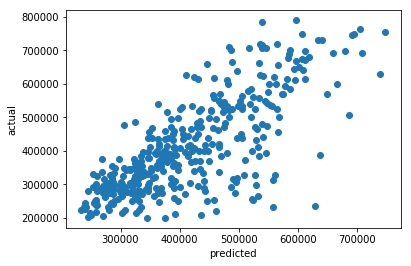

In [21]:
with warnings.catch_warnings():          # to ignore DataConversionWarning due to StandardScaler
    warnings.simplefilter("ignore")
    rf_pred = fitted_models['rf'].predict(X_test)
    plt.scatter(rf_pred, y_test)
    plt.xlabel('predicted')
    plt.ylabel('actual')
    plt.show()

In [22]:
type(rf_pred)

numpy.ndarray

<font size='4' color='red'>Saving the winner model</font>

In [23]:
#fitted models are GridSearchCV object
#hence we have to convert it first to Pipeline object
fitted_models['rf'].best_estimator_

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomforestregressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=123, verbose=0, warm_start=False))])

In [24]:
import pickle

with open('final_model.pkl', 'wb') as f:
    pickle.dump(fitted_models['rf'].best_estimator_, f)